#Import All Libarys

In [633]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,r2_score

# IMPORT THE DATASET 

In [634]:
df=pd.read_csv("gld_price_data.csv")

In [635]:
df.head(5)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [636]:
df.shape

(2290, 6)

In [637]:
# use the describe function for maths value
df.describe()


,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [638]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [639]:
df.drop_duplicates()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [640]:
#drop the columns date
df.drop(columns="Date",inplace=True)

In [641]:
df.isnull().sum()

SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [642]:
df.rename(columns={"GLD":"GOLD"},inplace=True)
#rename the GLD columns 

In [643]:
df.rename(columns={"SLV":"SILVER"},inplace=True)

In [644]:
df.head(3)

,SPX,GOLD,USO,SILVER,EUR/USD
0,1447.160034,84.860001,78.470001,15.180,1.471692
1,1447.160034,85.570000,78.370003,15.285,1.474491
2,1411.630005,85.129997,77.309998,15.167,1.475492


#Graph

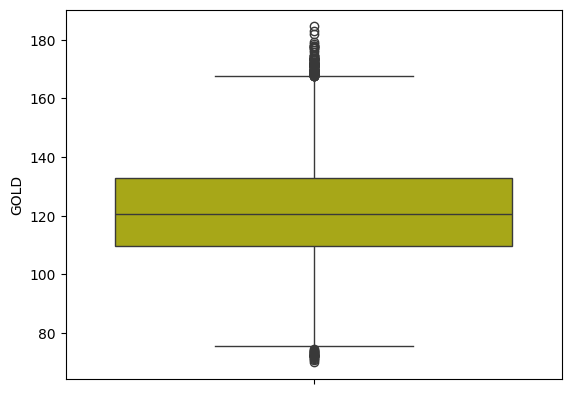

In [645]:
#Gold price graphs 
sns.boxplot(y="GOLD",data=df,color="y")
plt.show()

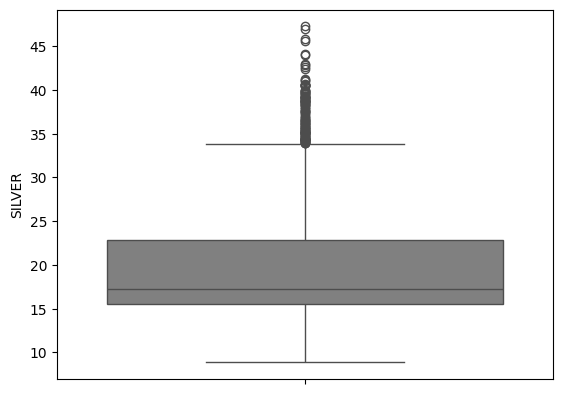

In [646]:
#silver pice
sns.boxplot(y="SILVER",data=df,color="grey")
plt.show()

#correlation


In [647]:

#find the correlation for all columns
cor=df.corr()

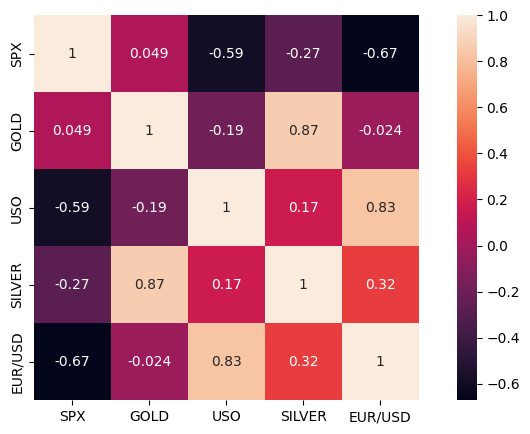

In [648]:
#using the heatmap for find the correlation
plt.figure(figsize=(10,5))
sns.heatmap(cor,annot=True,cbar=True,square=True)
plt.show()

splitting the features and target

In [649]:
x=df.drop(["GOLD"],axis=1)

In [650]:
y=df["GOLD"]

In [651]:
print(x)

              SPX        USO   SILVER   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [652]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GOLD, Length: 2290, dtype: float64


Train Test the Models

In [653]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [654]:
#train the models for using random forest regressor
re=RandomForestRegressor(n_estimators=100)

In [655]:
re.fit(x_train,y_train)

RandomForestRegressor()

In [656]:
#predict the test data
test_data_prediction=re.predict(x_test)
print(test_data_prediction)

[122.61333756 130.31780294 127.67779951  96.62249743 119.03610058
 114.44479927 124.86360145 117.7856996  108.0124013   98.21479946
  95.62359932 167.77069797 148.68750135 116.25830075 170.89720114
  85.26149982 123.07729884 109.52809705 113.43760088 131.70170217
 124.28689896 113.59770087 116.17320075 108.87769987 108.61190058
 125.89589895 119.56439948 112.24709953 113.36020164 125.6829989
 146.19270234  89.51520001 167.43929977 113.99649968 108.39770101
 120.27890113 141.49109836 161.28300075 173.97909817 153.16100122
 119.60480112 113.67020037 121.34959938 113.82859947 122.10300012
 108.08530097  88.58929891 114.40339909 129.72670252 117.86370084
 103.73310063 129.74080267 107.14909881 160.60010383 131.67469973
 117.82619985 147.22650065 134.7482022   95.47470103 124.53900132
 114.83429849  86.36270073 104.29789922 113.89340089  84.21769921
 122.32859996 116.51299911 113.69560211 165.51160233  92.35080021
  80.30950113 160.98610082 158.68650219 106.74210017 148.77630109
 109.487497

In [657]:
#r2_scores
error_scores=metrics.r2_score(y_test,test_data_prediction)*100
print(error_scores)

99.03203849936615


In [661]:
#mean square error
mse=mean_absolute_error(y_test,test_data_prediction)
print(mse)

1.2480642169869014


In [626]:
y_test=list(y_test)

#graph for Actual value VS Prediction

C:\Users\vrooo\AppData\Local\Temp\ipykernel_20140\2220057802.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


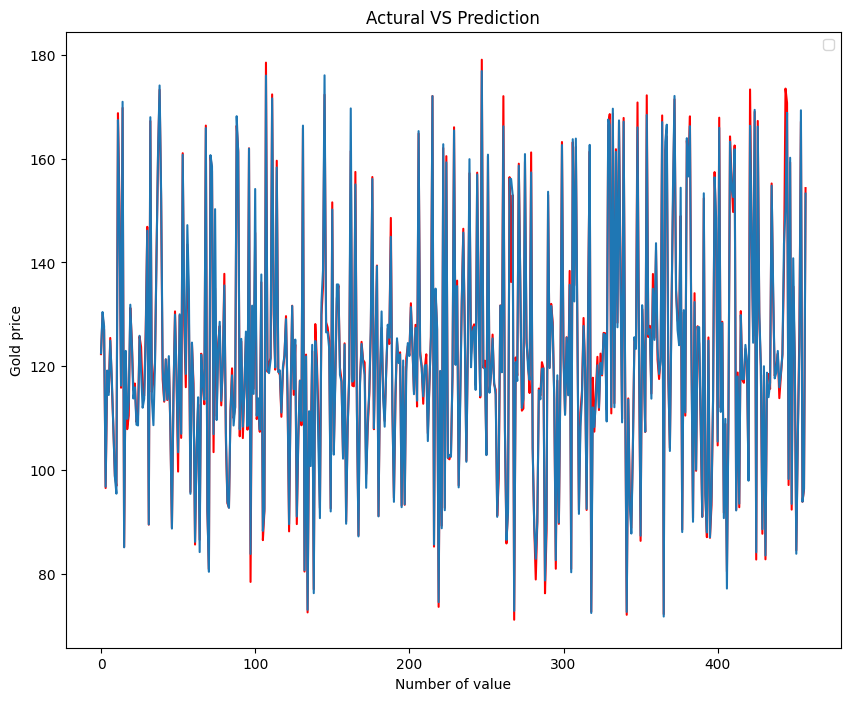

In [ ]:
plt.figure(figsize=(10,8))
plt.title("Actural VS Prediction")
plt.plot(y_test,data=df,color="r")
plt.plot(test_data_prediction,data=df)
plt.xlabel("Number of value")
plt.ylabel("Gold price")
plt.legend()
plt.show()